In [1]:
# this notebook is to utilised fastai api to train a model on a dataset to classify breastcancer cases
from fastai.vision.all import *

In [2]:
# get data
data_dir = '/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive'
fnames = get_image_files(data_dir)

# define label function to get the label from the file parent directory
def label_func(x): return x.parent.name

#setting up device to run on cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# define hyperparameters
batch_size = 100
num_epochs = 4
validation_split = 0.2
seed = 42
size = 50

In [4]:
# create dataloader object
dataloader = ImageDataLoaders.from_folder(path=data_dir, fnames=fnames,label_func=label_func, valid_pct = validation_split, seed=seed, bs=batch_size, device=device, item_tfms=Resize(size))

In [5]:
# check data
dataloader.train_ds.items[:3]

[Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive/12867/0/12867_idx5_x2701_y501_class0.png'),
 Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive/10290/0/10290_idx5_x801_y301_class0.png'),
 Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive/10259/0/10259_idx5_x2051_y801_class0.png')]

SuggestedLRs(valley=0.0005754399462603033)

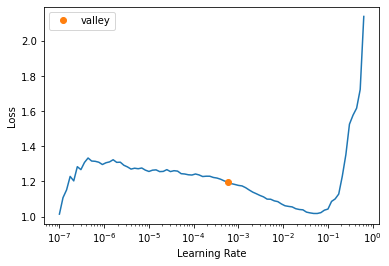

In [6]:
# define pre-trained model
learn = cnn_learner(dataloader, models.resnet34, metrics=error_rate)

# using learning rate finder to find optimal learning rate
learn.lr_find()

In [7]:
# fine tune model with optimal learning rate (valley)
learn.fine_tune(num_epochs,0.0008317637839354575)

epoch,train_loss,valid_loss,error_rate,time
0,0.351717,0.339053,0.142963,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.290181,0.282083,0.119217,02:07
1,0.255658,0.264151,0.108965,02:06
2,0.205934,0.274978,0.111704,02:06
3,0.104622,0.382150,0.115343,02:04


ERROR: Unexpected segmentation fault encountered in worker.
 

RuntimeError: DataLoader worker (pid 21012) is killed by signal: Segmentation fault. 

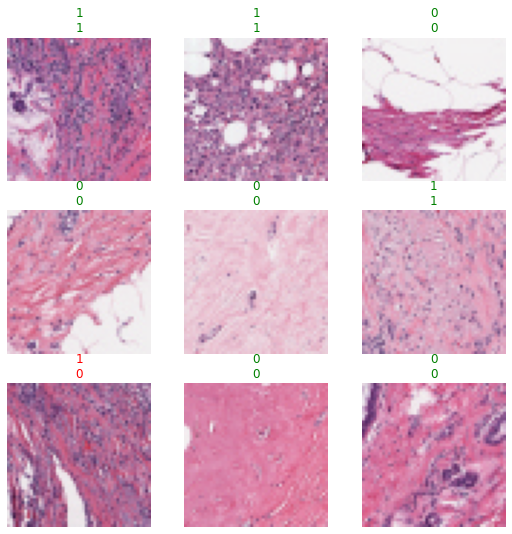

In [8]:
learn.show_results()